<a href="https://colab.research.google.com/github/Vignesh-kanna/ml_with_flask/blob/main/1_2_2025_%26_3_02_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Read the file into a DataFrame
cars = pd.read_csv(file_name)

# Display the DataFrame
print(cars.head())


Saving Cars.csv to Cars.csv
   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149


In [3]:
cars.shape

(81, 5)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [6]:
cars.isnull()

,HP,MPG,VOL,SP,WT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
76,False,False,False,False,False
77,False,False,False,False,False
78,False,False,False,False,False
79,False,False,False,False,False


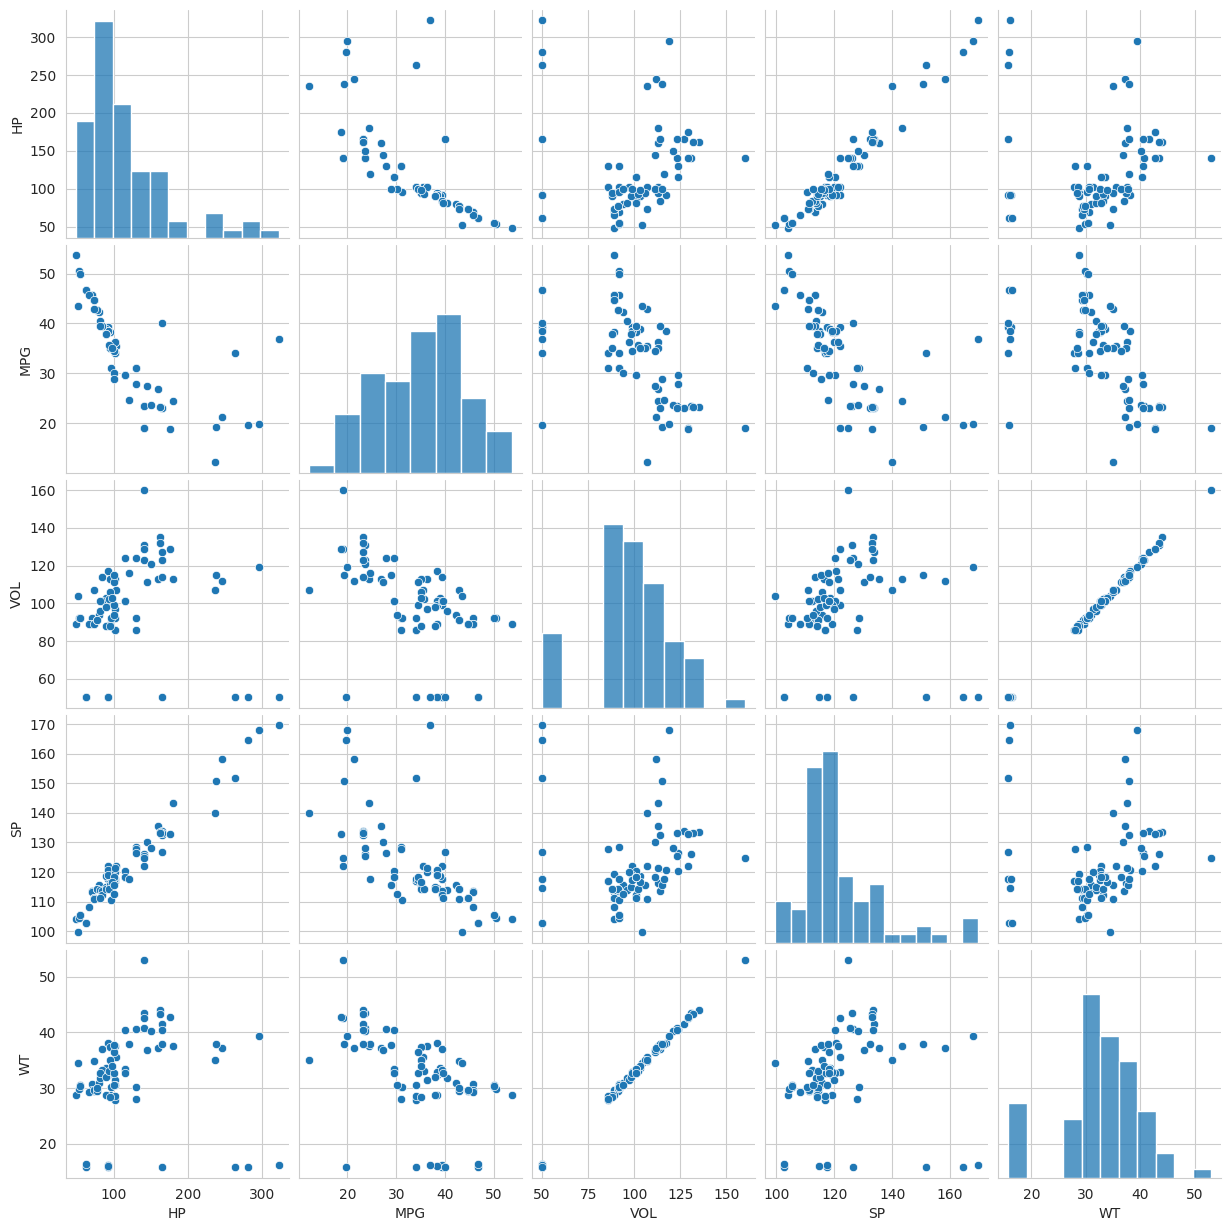

In [10]:
sns.set_style('whitegrid')
sns.pairplot(cars)
plt.show()

array([[<Axes: title={'center': 'HP'}>, <Axes: title={'center': 'MPG'}>],
       [<Axes: title={'center': 'VOL'}>, <Axes: title={'center': 'SP'}>],
       [<Axes: title={'center': 'WT'}>, <Axes: >]], dtype=object)

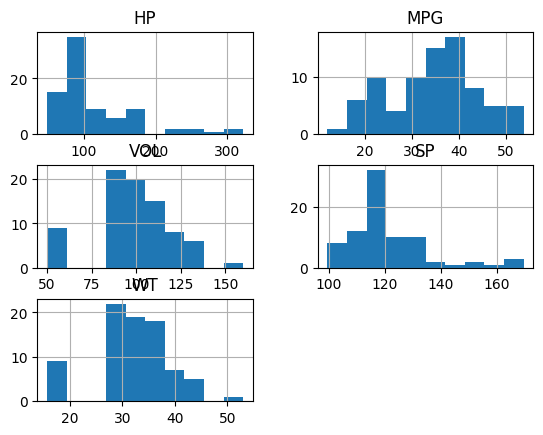

In [8]:
cars.hist()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # Importing the correct module for OLS

# ... (rest of your code for data loading and exploration) ...

# Fitting the OLS model
model = sm.OLS.from_formula('MPG ~ WT + VOL + SP + HP', data=cars).fit()

# ... (rest of your code for using the model) ...

In [14]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [15]:
#t and p-value
print(model.tvalues,'\n',model.pvalues)#model initalizaation

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [17]:
(model.rsquared, model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [22]:
import statsmodels.formula.api as smf # Import smf

ml_v = smf.ols('MPG~VOL', data=cars).fit()
print(ml_v.tvalues, ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [23]:
ml_w=smf.ols('MPG~WT',data = cars).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [26]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [27]:
(model.rsquared, model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [28]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [32]:
(ml_v.rsquared, ml_v.rsquared_adj)

(0.27990086511227075, 0.27078568618964116)

In [33]:
(ml_wv.rsquared, ml_wv.rsquared_adj)

(0.2821095616445982, 0.2637021145072803)